In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
import scipy.stats as stats
import seaborn as sns
import warnings
import matplotlib as mpl

warnings.filterwarnings("ignore")
pd.set_option("display.precision", 4)

In [9]:
plt.style.use("seaborn")
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [10]:
file_name = '/Users/dannystein/One Drive Folder/OneDrive/uchicago/portfolio_theory/dfa_analysis_data.xlsx'
descriptions = pd.read_excel(file_name,sheet_name = "descriptions")
descriptions = descriptions.rename(columns = {"Unnamed: 0": "Ticker"})
descriptions.head()

,Ticker,Name,Unit,Construction,Description
0,Mkt-RF,Market,Excess Return,Market-cap-weighted,US Equities
1,SMB,Size,Excess Return,Small Minus Big,Long small stocks and short big stocks
2,HML,Value,Excess Return,High Minus Low,Long value (high book-to-market) stocks and sh...
3,RF,Risk-free rate,Total Return,Tbills,NaN


## Homework 4

**Dimensional Fund Advisors**

DFA believes certain stocks have higher excess returns. In addition ot the overall market equity premium, DFA believes that there is a premium attached to size and the value factor. Calculate the univariate statistics on the Market Excess Return, **SMB** (Long small stocks and short big stocks), and **HML**(long value(high book-to-market) stocks and short growth stocks (low book-to-market ratios.

Report the mean, volatility, Sharpe, and VaR (.05)

In [11]:



df = pd.read_excel(file_name, sheet_name="factors", parse_dates=True)
df = df.set_index("Date")
factors = df.drop("RF", axis = 1)

In [12]:
def summary_stats(df, annual_frac):
    ss_df = (df.mean()*annual_frac).to_frame("Mean")
    ss_df["Volatility"] = df.std()*np.sqrt(annual_frac)
    ss_df["Sharpe"] = ss_df["Mean"]/ss_df["Volatility"]
    ss_df["VaR"] = df.quantile(.05)
    return ss_df.T

In [13]:
print("Period 1926-2022")
summary_stats(factors,12)

Period 1926-2022


,Mkt-RF,SMB,HML
Mean,0.0808,0.0233,0.0423
Volatility,0.1852,0.1099,0.1234
Sharpe,0.4361,0.2119,0.3430
VaR,-0.0796,-0.0420,-0.0419


In [14]:
print("From 1926 to 1980")
summary_stats(factors[:"1980"],12)

From 1926 to 1980


,Mkt-RF,SMB,HML
Mean,0.0811,0.0340,0.0495
Volatility,0.2051,0.1146,0.1338
Sharpe,0.3957,0.2966,0.3697
VaR,-0.0840,-0.0434,-0.0429


In [15]:
print("1981-2001")
summary_stats(factors["1981":"2001"],12)

1981-2001


,Mkt-RF,SMB,HML
Mean,0.0773,-0.0009,0.0637
Volatility,0.1574,0.1184,0.1113
Sharpe,0.4908,-0.0074,0.5727
VaR,-0.0645,-0.0466,-0.0418


In [16]:
print("2002-2022")
summary_stats(factors["2002":],12)

2002-2022


,Mkt-RF,SMB,HML
Mean,0.0833,0.0196,0.0017
Volatility,0.1540,0.0858,0.1045
Sharpe,0.5409,0.2288,0.0161
VaR,-0.0788,-0.0378,-0.0410


Answer the following  questions:
        
        1. Does each factor have a premium (positive excess return)?
        
        2. Does the premium to the size factor get smaller after 1980?
        
        3. Does the premium mto the value factor get smaller during the 1990's?
        
        4. How have the factors performed since the time of the case (2002-present)?

**Answers:**

1. No, in the period of 1981 - 2001, SMB (**Size Factors**) has negative excess return during this period. 
2. No, the size factor premium actually increases after 1980.
3. The value factor gets higher during the 1990s, but then declines during the periods of 2002-to present day. 
4. The factors have earned a positive premium to the risk-free rate since the time of the case, but they have not performed that well. The market factor has earned the best premium to the market. 

## Question 3

Report the correlation matrix accross all three factors and in each subsample period.


In [17]:
def corr_mat(df_):
    corr_mat = df_.corr()
    return corr_mat

In [18]:
corr_mat(factors)

,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.3163,0.2297
SMB,0.3163,1.0000,0.1147
HML,0.2297,0.1147,1.0000


In [19]:
corr_mat(factors[:"1980"])

,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.3663,0.4378
SMB,0.3663,1.0000,0.3091
HML,0.4378,0.3091,1.0000


In [20]:
corr_mat(factors["1981":"2001"])



,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.1643,-0.5268
SMB,0.1643,1.0000,-0.4548
HML,-0.5268,-0.4548,1.0000


In [21]:
corr_mat(factors["2002":])

,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.3162,0.1317
SMB,0.3162,1.0000,0.0929
HML,0.1317,0.0929,1.0000


Yes, I would say the correlations are quite small from sample to sample and even in the full sample suggesting the factors returns are not driven by the the overall market. 

## 4 Plot Cumulative Returns of the Three Factors

<AxesSubplot: title={'center': 'Value of $1 Invested'}, xlabel='Date'>

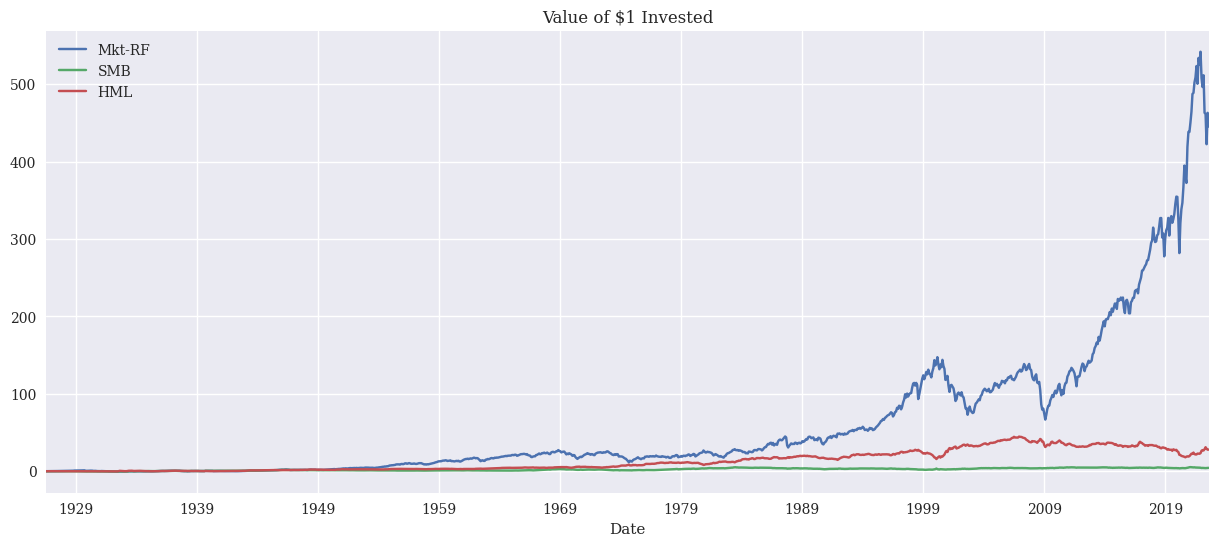

In [22]:
((1+factors).cumprod()-1).plot(figsize=(15,6), title = "Value of $1 Invested")

<AxesSubplot: title={'center': 'Cumulative Returns(1981-2001)'}, xlabel='Date'>

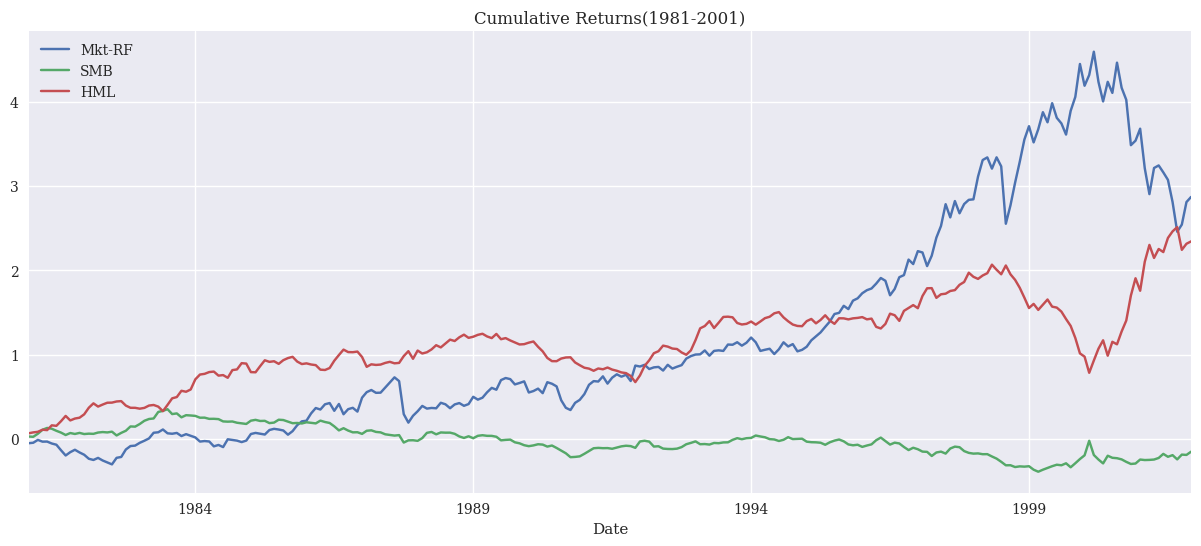

In [23]:
((1+factors["1981":"2001"]).cumprod()-1).plot(figsize = (15,6), title = "Cumulative Returns(1981-2001)")

<AxesSubplot: title={'center': 'Cumulative Returns(2002-Present)'}, xlabel='Date'>

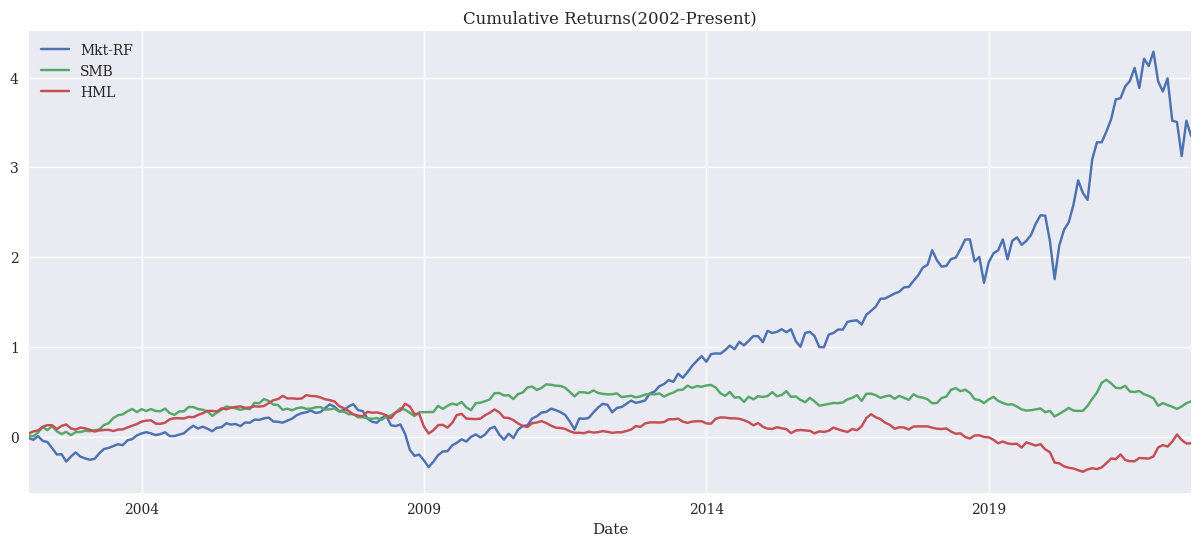

In [24]:
((1+factors["2002":]).cumprod()-1).plot(figsize = (15,6), title = "Cumulative Returns(2002-Present)")

Does it appear that all three factors were valuable in 1981-2001? And post-2001? Would you
advise DFA to continue emphasizing all three factors?

No, not all the factors were valuable in 1981-2001. The **size factor** earns a negative premium. However, even though these factors do not earn a better returns to the market, nor have better sharpe ratios, this does not mean DFA should disregard these factors. Since their correlations are small, these factors could have have great diversification benefits for investors. 

## CAPM

DFA believes that premia in stocks and stock portfolios is related to the three factors.
Let’s test 25 equity portfolios that span a wide range of size and value measures.

- For this entire problem focus on the 1981-Present subsample. 

1. Calculate summary statistics for each portfolio,
   1. Use the risk-free rate column in the factors tab to convert these total returns to excess returns.
   2. Calculate the annualized univariate statistics from 1.1
   3. Can the difference in mean excess returns of the portfolios be explained by the idfference in their volatilities.




In [25]:
portfolio = pd.read_excel(file_name,sheet_name="portfolios (total returns)")
portfolio = portfolio.set_index("Date")
portfolios_ex = portfolio.subtract(df["RF"], axis = 'rows')


In [26]:
subsample = portfolios_ex["1981":]
port_summary = summary_stats(subsample,12).T
port_summary["portfolio_num"] = range(1,26)
port_summary

,Mean,Volatility,Sharpe,VaR,portfolio_num
SMALL LoBM,0.0105,0.2724,0.0384,-0.1165,1
ME1 BM2,0.0957,0.2359,0.4058,-0.0976,2
ME1 BM3,0.0929,0.1972,0.4711,-0.0864,3
ME1 BM4,0.1200,0.1914,0.6270,-0.0752,4
SMALL HiBM,0.1321,0.2077,0.6361,-0.0883,5
ME2 BM1,0.0603,0.2457,0.2453,-0.1046,6
ME2 BM2,0.1006,0.2032,0.4953,-0.0840,7
ME2 BM3,0.1066,0.1831,0.5824,-0.0787,8
ME2 BM4,0.1077,0.1792,0.6012,-0.0764,9
ME2 BM5,0.1181,0.2120,0.5571,-0.0942,10


In [31]:
subsample.mean().head(5)

SMALL LoBM    0.0009
ME1 BM2       0.0080
ME1 BM3       0.0077
ME1 BM4       0.0100
SMALL HiBM    0.0110
dtype: float64

In [27]:
subsample

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-31,-0.0549,-0.0149,0.0099,0.0059,0.0211,-0.0597,-0.0107,-0.0127,0.0076,0.0206,...,-0.0770,-0.0449,-0.0129,-0.0055,0.0039,-0.0717,-0.0836,-0.0743,-0.0100,0.0095
1981-02-28,-0.0447,-0.0105,0.0014,0.0092,0.0144,-0.0145,0.0051,0.0174,0.0244,0.0279,...,0.0026,0.0147,0.0347,0.0027,0.0272,0.0219,0.0094,-0.0164,0.0204,-0.0169
1981-03-31,0.0607,0.0824,0.0736,0.0777,0.0610,0.0681,0.0715,0.0663,0.0663,0.0632,...,0.0804,0.0557,0.0732,0.0619,0.0649,0.0174,0.0199,-0.0089,0.0222,0.0696
1981-04-30,0.0181,0.0359,0.0246,0.0365,0.0441,0.0060,0.0247,0.0266,0.0268,0.0294,...,-0.0108,-0.0191,-0.0060,-0.0078,0.0063,-0.0383,-0.0535,-0.0380,0.0104,-0.0404
1981-05-31,0.0382,0.0378,0.0324,0.0134,0.0168,0.0505,0.0103,0.0169,-0.0086,0.0136,...,0.0240,0.0102,0.0076,-0.0008,0.0220,0.0043,-0.0328,-0.0314,0.0267,-0.0060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,-0.1616,-0.1325,-0.1000,-0.0635,-0.0411,-0.1820,-0.1208,-0.0855,-0.0630,-0.0598,...,-0.1074,-0.0805,-0.0484,-0.0569,-0.0706,-0.1087,-0.0922,-0.0716,-0.0553,-0.0743
2022-05-31,-0.0586,-0.0359,-0.0101,-0.0018,0.0293,-0.0332,-0.0285,0.0198,0.0401,0.0572,...,-0.0298,0.0111,0.0403,0.0086,0.0826,-0.0304,-0.0035,0.0278,0.0644,0.0637
2022-06-30,-0.0671,-0.0433,-0.0431,-0.0663,-0.0994,-0.0211,-0.0630,-0.0685,-0.0628,-0.1303,...,-0.0735,-0.0957,-0.1123,-0.1016,-0.1330,-0.0787,-0.0559,-0.0884,-0.1216,-0.1224


In [28]:
markers=['o', 'v', '^', '>', '<', 'p', '*', 'X', 'D', '1','o',\
         'v', '^', '>', '<', 'p', '*', 'X', 'D', '1','o', 'v', '^', '>', '<']
sns.set_style("whitegrid")
ax = sns.lmplot('Volatility', # Horizontal axis
               'Mean', # Vertical axis
               hue='portfolio_num',palette="Set1",scatter_kws={"s": 100},
                data=port_summary, # Data source
               fit_reg=False, # Don't fix a regression line
               markers=markers,
               aspect =1) # size and dimension
ax.fig.set_figwidth(16)
ax.fig.set_figheight(7)
plt.title('Portfolios sorted by their size-value characteristics', fontsize=18)
plt.xlabel('Volatility', fontsize=16)
plt.ylabel('Mean', fontsize=16)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(int(point['val'])), fontsize=14,\
                horizontalalignment='center', verticalalignment='bottom')

label_point(port_summary.Volatility, port_summary.Mean,port_summary.portfolio_num, plt.gca())


TypeError: lmplot() got multiple values for argument 'data'

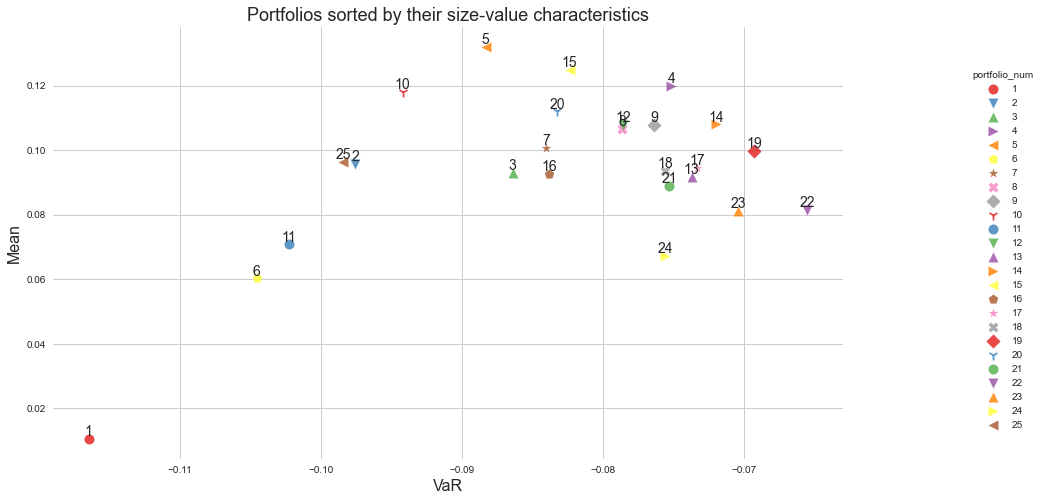

In [ ]:
markers=['o', 'v', '^', '>', '<', 'p', '*', 'X', 'D', '1','o',\
         'v', '^', '>', '<', 'p', '*', 'X', 'D', '1','o', 'v', '^', '>', '<']
sns.set_style("whitegrid")
ax = sns.lmplot('VaR', # Horizontal axis
               'Mean', # Vertical axis
               hue='portfolio_num',palette="Set1",scatter_kws={"s": 100},
                data=port_summary, # Data source
               fit_reg=False, # Don't fix a regression line
               markers=markers,
               aspect =1) # size and dimension
ax.fig.set_figwidth(16)
ax.fig.set_figheight(7)
plt.title('Portfolios sorted by their size-value characteristics', fontsize=18)
plt.xlabel('VaR', fontsize=16)
plt.ylabel('Mean', fontsize=16)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(int(point['val'])), fontsize=14,\
                horizontalalignment='center', verticalalignment='bottom')

label_point(port_summary.VaR, port_summary.Mean,port_summary.portfolio_num, plt.gca())

From the two graphs above, the differences in mean excess returns cannot be explained by their volatilities or Value-at-Risk measures. This is interesting, because holding everthing else constant, higher risk should mean higher excess returns. As we can see, some portfolios with higher volatities actually have lower mean returns. 

The Capital Asset Pricing Model (CAPM) asserts that an asset (or portfolio’s) expected excess
return is completely a function of its beta to the equity market index (SPY, or in this case,
MKT.)

For each of the $n=25$ test portfolios, run the $CAPM$ time-series regression. Report the estimated $\beta^{i,m}$, Treynor ratio, $\alpha^{i}$, and Information Ratio for each of the $n=25$ regressions.

In [ ]:
capm_data = portfolios_ex.join(df['Mkt-RF'])["1981":]

In [ ]:
capm_report = pd.DataFrame(index=portfolios_ex.columns)
rhs = sm.add_constant(capm_data['Mkt-RF'])
bm_residuals = pd.DataFrame(columns=portfolios_ex.columns)
t_p_values = pd.DataFrame()

for portf in portfolios_ex.columns:
    lhs = capm_data[portf]
    res = sm.OLS(lhs, rhs, missing='drop').fit()
    capm_report.loc[portf, 'alpha_hat'] = res.params['const'] * 12
    capm_report.loc[portf, 'beta_hat'] = res.params['Mkt-RF']
    capm_report.loc[portf, 'info_ratio'] = np.sqrt(12) * res.params['const'] / res.resid.std()
    capm_report.loc[portf, 'treynor_ratio'] = 12 * capm_data[portf].mean() / res.params['Mkt-RF']
    capm_report.loc[portf,"Mean Return"] = 12*capm_data[portf].mean()
    bm_residuals[portf] = res.resid
    t_p_values.loc[portf, 't-value'] = res.params['const']
    t_p_values.loc[portf, 't-value'] = res.tvalues['const']
    t_p_values.loc[portf, 'p-value'] = round(res.pvalues['const'], 4)

In [ ]:
capm_report

,alpha_hat,beta_hat,info_ratio,treynor_ratio,Mean Return
SMALL LoBM,-0.0987,1.3600,-0.5750,0.0077,0.0105
ME1 BM2,0.0018,1.1702,0.0122,0.0818,0.0957
ME1 BM3,0.0097,1.0365,0.0857,0.0896,0.0929
ME1 BM4,0.0425,0.9652,0.3585,0.1243,0.1200
SMALL HiBM,0.0526,0.9907,0.3778,0.1333,0.1321
ME2 BM1,-0.0475,1.3433,-0.3677,0.0449,0.0603
ME2 BM2,0.0101,1.1286,0.0984,0.0892,0.1006
ME2 BM3,0.0248,1.0193,0.2712,0.1046,0.1066
ME2 BM4,0.0303,0.9654,0.3094,0.1116,0.1077
ME2 BM5,0.0292,1.1086,0.2363,0.1066,0.1181


## Testing the CAPM Model

- Conduct a cross-sectional regression on the individual regressions we just performed above. 

In [ ]:
y = subsample.mean()
X = sm.add_constant(capm_report["beta_hat"])
capm_reg = sm.OLS(y,X, missing = 'drop').fit()

capm_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     8.008
Date:                Mon, 24 Oct 2022   Prob (F-statistic):            0.00950
Time:                        11:44:05   Log-Likelihood:                 123.51
No. Observations:                  25   AIC:                            -243.0
Df Residuals:                      23   BIC:                            -240.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0165      0.003      5.362      0.000       0.010       0.023
beta_hat      -0.0082      0.003     -2.830      0.009      -0.014      -0.002
==============================================================================
Omnibus:                        4.531   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                2.975
Skew:                          -0.820   Prob(JB):                        0.226
Kurtosis:                       3.408   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print("Alpha: {}; Beta {}: ; Rsquared: {}".format(capm_reg.params[0]*12,capm_reg.params[1]*12,capm_reg.rsquared))

Alpha: 0.19798077049490984; Beta -0.09815760379979337: ; Rsquared: 0.2582451192136339


The **CAPM** says the beta is the only risk assoicated with excess returns. In this case, the r-squared should be 100% and alpha should be zero, however, this is not what we see in the regression data. The **Betas** of the portfolios only explain 25% of the variation of the excess returns of the portfolios. 

- There is no evidence suggesting size and value portfolios contain a premium unrelated to the market. However, we can say that risk matters beyond just beta since $\alpha$ is clearly not close to 0 from the regression.

## Extensions

Re-do the analysis of the CAPM and use all three factors *MKT,SMB,HML.* Thus you will be testing the **FAMA-French 3-factor Model.**


In [ ]:
ff_data = portfolios_ex.join(df)["1981":]
ff_data

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-31,-0.0549,-0.0149,0.0099,0.0059,0.0211,-0.0597,-0.0107,-0.0127,0.0076,0.0206,...,0.0039,-0.0717,-0.0836,-0.0743,-0.0100,0.0095,-0.0504,0.0292,0.0672,0.0104
1981-02-28,-0.0447,-0.0105,0.0014,0.0092,0.0144,-0.0145,0.0051,0.0174,0.0244,0.0279,...,0.0272,0.0219,0.0094,-0.0164,0.0204,-0.0169,0.0057,-0.0034,0.0102,0.0107
1981-03-31,0.0607,0.0824,0.0736,0.0777,0.0610,0.0681,0.0715,0.0663,0.0663,0.0632,...,0.0649,0.0174,0.0199,-0.0089,0.0222,0.0696,0.0356,0.0354,0.0064,0.0121
1981-04-30,0.0181,0.0359,0.0246,0.0365,0.0441,0.0060,0.0247,0.0266,0.0268,0.0294,...,0.0063,-0.0383,-0.0535,-0.0380,0.0104,-0.0404,-0.0211,0.0440,0.0228,0.0108
1981-05-31,0.0382,0.0378,0.0324,0.0134,0.0168,0.0505,0.0103,0.0169,-0.0086,0.0136,...,0.0220,0.0043,-0.0328,-0.0314,0.0267,-0.0060,0.0011,0.0200,-0.0042,0.0115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,-0.1616,-0.1325,-0.1000,-0.0635,-0.0411,-0.1820,-0.1208,-0.0855,-0.0630,-0.0598,...,-0.0706,-0.1087,-0.0922,-0.0716,-0.0553,-0.0743,-0.0946,-0.0141,0.0619,0.0001
2022-05-31,-0.0586,-0.0359,-0.0101,-0.0018,0.0293,-0.0332,-0.0285,0.0198,0.0401,0.0572,...,0.0826,-0.0304,-0.0035,0.0278,0.0644,0.0637,-0.0034,-0.0185,0.0841,0.0003
2022-06-30,-0.0671,-0.0433,-0.0431,-0.0663,-0.0994,-0.0211,-0.0630,-0.0685,-0.0628,-0.1303,...,-0.1330,-0.0787,-0.0559,-0.0884,-0.1216,-0.1224,-0.0843,0.0209,-0.0597,0.0006


In [ ]:
ff_report = pd.DataFrame(index=portfolios_ex.columns)
rhs = sm.add_constant(ff_data[['Mkt-RF','SMB','HML']])

for portf in portfolios_ex.columns:
    lhs = ff_data[portf]
    res = sm.OLS(lhs, rhs, missing='drop').fit()
    ff_report.loc[portf, 'alpha_hat'] = res.params['const'] * 12
    ff_report.loc[portf, 'beta_mkt'] = res.params['Mkt-RF']
    ff_report.loc[portf, 'beta_s'] = res.params['SMB']       
    ff_report.loc[portf, 'beta_v'] = res.params['HML']                          
    ff_report.loc[portf, 'info_ratio'] = np.sqrt(12) * res.params['const'] / res.resid.std()
    ff_report.loc[portf, 'treynor_ratio'] = 12 * ff_data[portf].mean() / res.params['Mkt-RF']
ff_report

,alpha_hat,beta_mkt,beta_s,beta_v,info_ratio,treynor_ratio
SMALL LoBM,-8.3200e-02,1.1162,1.3722,-0.2629,-0.9288,0.0094
ME1 BM2,5.9122e-03,0.9722,1.3145,-0.0126,0.0847,0.0985
ME1 BM3,8.6004e-05,0.9216,1.0463,0.2774,0.0019,0.1008
ME1 BM4,2.3969e-02,0.8783,1.0580,0.4768,0.5033,0.1366
SMALL HiBM,2.4209e-02,0.9359,1.0610,0.6956,0.3231,0.1411
ME2 BM1,-2.9881e-02,1.1424,1.0150,-0.3323,-0.4994,0.0528
ME2 BM2,7.0806e-03,1.0120,0.9012,0.1201,0.1421,0.0994
ME2 BM3,8.8349e-03,0.9730,0.7078,0.3982,0.1705,0.1096
ME2 BM4,6.2321e-03,0.9409,0.7422,0.5797,0.1390,0.1145
ME2 BM5,-5.2842e-03,1.0933,0.9219,0.8224,-0.1127,0.1080


Re-do the analysis of 3.3 and 3.3, but instead of using the market return as the factor, use a
new factor: the in-sample tangency portfolio of the n = 25 portfolios.
You will not use the factor data for this problem!


In [ ]:
y = subsample.mean()

# The regressor, (x): the market beta from each of the n = 25 time-series regressions.
X = sm.add_constant(ff_report[['beta_mkt','beta_s','beta_v']])

res = sm.OLS(y,X,missing='drop').fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     6.121
Date:                Mon, 24 Oct 2022   Prob (F-statistic):            0.00369
Time:                        11:59:42   Log-Likelihood:                 127.63
No. Observations:                  25   AIC:                            -247.3
Df Residuals:                      21   BIC:                            -242.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0150      0.005      3.311      0.003       0.006       0.024
beta_mkt      -0.0080      0.004     -1.845      0.079      -0.017       0.001
beta_s         0.0002      0.001      0.361      0.721      -0.001       0.002
beta_v         0.0030      0.001      3.705      0.001       0.001       0.005
==============================================================================
Omnibus:                       15.621   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.758
Skew:                          -1.490   Prob(JB):                     0.000230
Kurtosis:                       5.685   Cond. No.                         30.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(f"R-squared: {res.rsquared}")
print(f"Intercept: {res.params[0] * 12}")
print(f"Regression coefficient for market beta: {res.params[1]*12}")
print(f"Regression coefficient for size beta: {res.params[2]*12}")
print(f"Regression coefficient for value beta: {res.params[3]*12}")

R-squared: 0.46651395727533507
Intercept: 0.1797402802352507
Regression coefficient for market beta: -0.09567612643110464
Regression coefficient for size beta: 0.0028937271062240573
Regression coefficient for value beta: 0.036210032456927506


In [ ]:
print(f"Expected market excess return: {ff_data['Mkt-RF'].mean()*12}")
print(f"Expected premium to size factor: {ff_data['SMB'].mean()*12}")
print(f"Expected premium to value factor: {ff_data['HML'].mean()*12}")

Expected market excess return: 0.08024879999999998
Expected premium to size factor: 0.0092952
Expected premium to value factor: 0.032952000000000016


In [ ]:
# 4.2
def compute_tangency(df_tilde, diagonalize_Sigma=False):

    """Compute tangency portfolio given a set of excess returns.

    Also, for convenience, this returns the associated vector of average

    returns and the variance-covariance matrix.

    Parameters

    ----------

    diagonalize_Sigma: bool

        When `True`, set the off diagonal elements of the variance-covariance

        matrix to zero.

    """
    Sigma = df_tilde.cov()

    # N is the number of assets

    N = Sigma.shape[0]

    Sigma_adj = Sigma.copy()

    if diagonalize_Sigma:

        Sigma_adj.loc[:,:] = np.diag(np.diag(Sigma_adj))

    mu_tilde = df_tilde.mean()

    Sigma_inv = np.linalg.inv(Sigma_adj)

    weights = Sigma_inv @ mu_tilde / (np.ones(N) @ Sigma_inv @ mu_tilde)

    # For convenience, I'll wrap the solution back into a pandas.Series object.
    omega_tangency = pd.Series(weights, index=mu_tilde.index)
    
    return omega_tangency, mu_tilde, Sigma_adj

In [ ]:
omega_tangency,mu_silde,Sigma_adj = compute_tangency(subsample)


In [ ]:
omega_tangency

SMALL LoBM   -2.2576
ME1 BM2       0.8976
ME1 BM3      -0.0612
ME1 BM4       1.3570
SMALL HiBM    0.9409
ME2 BM1      -0.3169
ME2 BM2       0.8624
ME2 BM3       0.2559
ME2 BM4      -0.3609
ME2 BM5      -0.8624
ME3 BM1      -0.5990
ME3 BM2       0.1254
ME3 BM3      -0.5004
ME3 BM4       0.2890
ME3 BM5       0.2625
ME4 BM1       1.2849
ME4 BM2      -0.5254
ME4 BM3      -0.3362
ME4 BM4       0.0566
ME4 BM5       0.2444
BIG LoBM      1.0422
ME5 BM2      -0.2006
ME5 BM3       0.0697
ME5 BM4      -0.9925
BIG HiBM      0.3244
dtype: float64

In [ ]:
ex_return_tan = subsample @ omega_tangency

In [ ]:
tan_report = pd.DataFrame(index=portfolios_ex.columns)
rhs = sm.add_constant(ex_return_tan)

for portf in portfolios_ex.columns:
    lhs = ff_data[portf]
    res = sm.OLS(lhs, rhs, missing='drop').fit()
    tan_report.loc[portf, 'alpha_hat'] = res.params['const'] * 12
    tan_report.loc[portf, 'beta_hat'] = res.params[0]                         
    tan_report.loc[portf, 'info_ratio'] = np.sqrt(12) * res.params['const'] / res.resid.std()
tan_report

,alpha_hat,beta_hat,info_ratio
SMALL LoBM,1.7564e-16,0.0259,6.4488e-16
ME1 BM2,3.8641e-16,0.2366,1.6769e-15
ME1 BM3,4.6577e-16,0.2296,2.4385e-15
ME1 BM4,-3.0314e-16,0.2965,-1.6787e-15
SMALL HiBM,3.9942e-16,0.3264,2.0418e-15
ME2 BM1,-3.9031e-16,0.1490,-1.6021e-15
ME2 BM2,-1.3791e-16,0.2487,-7.0331e-16
ME2 BM3,1.0434e-15,0.2635,5.9898e-15
ME2 BM4,2.6021e-16,0.2663,1.5310e-15
ME2 BM5,6.8695e-16,0.2919,3.3895e-15


In [ ]:
y = subsample.mean()

# The regressor, (x): the market beta from each of the n = 25 time-series regressions.
X = sm.add_constant(tan_report['beta_hat'])

res = sm.OLS(y,X,missing='drop').fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.308e+29
Date:                Mon, 24 Oct 2022   Prob (F-statistic):          1.08e-320
Time:                        12:07:26   Log-Likelihood:                 918.63
No. Observations:                  25   AIC:                            -1833.
Df Residuals:                      23   BIC:                            -1831.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.253e-18   2.24e-17     -0.145      0.886   -4.96e-17    4.31e-17
beta_hat       0.0337   9.32e-17   3.62e+14      0.000       0.034       0.034
==============================================================================
Omnibus:                        1.317   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.518   Jarque-Bera (JB):                1.170
Skew:                          -0.480   Prob(JB):                        0.557
Kurtosis:                       2.549   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(f"R-squared: {res.rsquared}")
print(f"Intercept: {res.params[0] * 12}")
print(f"Regression coefficient for tangency beta: {res.params[1]}")

R-squared: 1.0
Intercept: -3.903127820947816e-17
Regression coefficient for tangency beta: 0.033720564437420955


In [ ]:
print(f"Expected premium to tangency portfolio: {ex_return_tan.mean()}")

Expected premium to tangency portfolio: 0.03372056443742081


**Solution:** The cross-sectional regression coefficient for the tangency beta is exactly the same as the expected premium of the tangency portfolio. 

In [ ]:
MAE_alpha = (100 * capm_report['alpha_hat']).abs().mean()
print('MAE = {:.2f} %'.format(MAE_alpha))

MAE = 2.43 %


 Under classic statistical assumptions, we can test the null hypothesis that the CAPM works
by calculating the following:

In [ ]:
T = subsample.dropna().shape[0]
SR = capm_data['Mkt-RF'].mean() / capm_data['Mkt-RF'].std()
Sigma = bm_residuals.cov()
Sigma_inv = pd.DataFrame(np.linalg.inv(Sigma), index=Sigma.index, columns=Sigma.columns)
alpha = capm_report['alpha_hat']
H = T * (1 + SR**2)**(-1) * alpha @ Sigma_inv @ alpha
print('H = {:.2f}'.format(H))
pvalue = 1 - stats.chi2.cdf(H, df=25)
print('p-value = {:.4f}'.format(pvalue))

H = 20068.02
p-value = 0.0000


In [ ]:
# (c)
display(t_p_values.sort_values(by='p-value', ascending=False))

,t-value,p-value
ME1 BM2,0.0775,0.9382
ME4 BM1,-0.2250,0.8221
ME5 BM4,-0.3397,0.7342
ME1 BM3,0.5468,0.5847
ME2 BM2,0.6276,0.5306
BIG HiBM,0.7185,0.4728
ME5 BM2,0.8102,0.4182
ME4 BM2,0.9342,0.3506
ME5 BM3,1.0249,0.3059
BIG LoBM,1.1152,0.2653


Which is a stricter test: checking if individual alphas are individually significant or if the they are all jointly significant?

The stricter test is joint significance because it means that those portfolio's factors are all jointly different from 0. 

Conceptually, how does the test-statistic H relate to checing whether $\tilde{r}^{m}$ spans the tangency portfolio?

**Answer:** 

- We have demonstrated that an LFM is exactly the same as asserting that a set of factors spans the MV frontier, (and thus spans the tangency portfolio.) Thus, this test can be interpreted as checking whether investing in the alphas gets beyond the tangency portfolio. The test stat is basically comparing the square SR of the alphas to the square SR of the factors.